In [1]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import cantera as ct
import IPython

In [2]:
# Initially, I used the following code in MatLab to convert the .mat data files to csv
# csvwrite('NCO_big_1332.csv', NCO_01)
# csvwrite('P_big_1332.csv', P_01)
# csvwrite('T_big_1332.csv', T_01)
# a different code was used for each run of the data, 1332 pertains to Run 01

In [3]:
# Importing data as dataframes by calling the first data csv file NCO_# and adding columns from T_# and P_#

run1 = pd.read_csv('NCO_01.csv', header=None, names=['NCO1']) #create run1 dataframe
run1['Pressure1'] = pd.read_csv('P_01.csv', header=None) #append run1 with Pressure data from run 01
run1['Temperature1'] = pd.read_csv('T_01.csv', header=None) #append run1 with Temperature data from run 01

run5 = pd.read_csv('NCO_05.csv', header=None, names=['NCO5'])
run5['Pressure5'] = pd.read_csv('P_05.csv', header=None)
run5['Temperature5'] = pd.read_csv('T_05.csv', header=None)

run9 = pd.read_csv('NCO_09.csv', header=None, names=['NCO9'])
run9['Pressure9'] = pd.read_csv('P_09.csv', header=None)
run9['Temperature9'] = pd.read_csv('T_09.csv', header=None)

run11 = pd.read_csv('NCO_11.csv', header=None, names=['NCO11'])
run11['Pressure11'] = pd.read_csv('P_11.csv', header=None)
run11['Temperature11'] = pd.read_csv('T_11.csv', header=None)

In [4]:
NCO = pd.concat([run1['NCO1'], run5['NCO5'], run9['NCO9'], run11['NCO11']], axis=1)
Pressure = pd.concat([run1['Pressure1'], run5['Pressure5'], run9['Pressure9'], run11['Pressure11']], axis=1)
Temperature = pd.concat([run1['Temperature1'], run5['Temperature5'], run9['Temperature9'], run11['Temperature11']], axis=1)

In [5]:
# checking data, cross-reference with the .csv file to make sure no data was cut off
print(run1.head())
print(run5.head())
print(run9.head())
print(run11.head())

           NCO1  Pressure1  Temperature1
0  3.558400e+17       2.51        2919.2
1  5.569900e+17       2.49        2833.9
2  7.094200e+17       2.35        2765.3
3  8.750300e+17       2.25        2758.2
4  1.082600e+18       2.37        2753.4
           NCO5  Pressure5  Temperature5
0  6.028600e+16    0.57403        2249.0
1  5.762000e+16    0.64954        1932.8
2  5.544700e+16    0.61679        2026.4
3  6.341100e+16    0.75650        1865.9
4  7.941800e+16    0.83119        2535.5
           NCO9  Pressure9  Temperature9
0  1.564200e+17     1.6436        1841.7
1  1.604000e+17     1.5679        2061.3
2  1.875900e+17     1.6334        2124.7
3  2.010000e+17     1.5393        2050.1
4  2.326600e+17     1.6057        2144.8
          NCO11  Pressure11  Temperature11
0  5.865700e+17     0.69161         2023.4
1  5.813200e+17     0.65457         1911.5
2  5.633000e+17     0.64446         1765.3
3  5.300100e+17     0.59695         1562.2
4  5.420200e+17     0.61506         1591.2


In [6]:
print(NCO.head())
print(Pressure.head())
print(Temperature.head())

           NCO1          NCO5          NCO9         NCO11
0  3.558400e+17  6.028600e+16  1.564200e+17  5.865700e+17
1  5.569900e+17  5.762000e+16  1.604000e+17  5.813200e+17
2  7.094200e+17  5.544700e+16  1.875900e+17  5.633000e+17
3  8.750300e+17  6.341100e+16  2.010000e+17  5.300100e+17
4  1.082600e+18  7.941800e+16  2.326600e+17  5.420200e+17
   Pressure1  Pressure5  Pressure9  Pressure11
0       2.51    0.57403     1.6436     0.69161
1       2.49    0.64954     1.5679     0.65457
2       2.35    0.61679     1.6334     0.64446
3       2.25    0.75650     1.5393     0.59695
4       2.37    0.83119     1.6057     0.61506
   Temperature1  Temperature5  Temperature9  Temperature11
0        2919.2        2249.0        1841.7         2023.4
1        2833.9        1932.8        2061.3         1911.5
2        2765.3        2026.4        2124.7         1765.3
3        2758.2        1865.9        2050.1         1562.2
4        2753.4        2535.5        2144.8         1591.2


In [7]:
NCOAll = pd.DataFrame.dropna(NCO, axis=0)
PresAll = pd.DataFrame.dropna(Pressure, axis=0)
TempAll = pd.DataFrame.dropna(Temperature, axis=0)

In [8]:
# checking lengths for all dataframes for comparison
print(run1.shape)
print(run5.shape)
print(run9.shape)
print(run11.shape)
print(NCOAll.shape)
print(PresAll.shape)
print(TempAll.shape)

(780853, 3)
(377296, 3)
(779528, 3)
(404334, 3)
(372913, 4)
(372913, 4)
(372913, 4)


In [9]:
# Comparing max Pressure in each run
print(max(run1['Pressure1'])) # 
print(max(run5['Pressure5']))
print(max(run9['Pressure9']))
print(max(run11['Pressure11']))

5.78
5.2519
6.2109
1.8232


In [10]:
# Comparing max NCO in each run
print(max(run1['NCO1']))
print(max(run5['NCO5']))
print(max(run9['NCO9']))
print(max(run11['NCO11']))

1.0628e+19
1.2962e+18
9.4954e+18
1.4662e+18


In [11]:
print(run1.corr())
print(run5.corr())
print(run9.corr())
print(run11.corr())

                  NCO1  Pressure1  Temperature1
NCO1          1.000000   0.577754      0.384454
Pressure1     0.577754   1.000000      0.846556
Temperature1  0.384454   0.846556      1.000000
                  NCO5  Pressure5  Temperature5
NCO5          1.000000   0.587932      0.389169
Pressure5     0.587932   1.000000      0.593298
Temperature5  0.389169   0.593298      1.000000
                  NCO9  Pressure9  Temperature9
NCO9          1.000000   0.532836      0.296858
Pressure9     0.532836   1.000000      0.781990
Temperature9  0.296858   0.781990      1.000000
                  NCO11  Pressure11  Temperature11
NCO11          1.000000    0.670879       0.052715
Pressure11     0.670879    1.000000       0.518908
Temperature11  0.052715    0.518908       1.000000


In [12]:
print(NCOAll.corr())
print(PresAll.corr())
print(TempAll.corr())

           NCO1      NCO5      NCO9     NCO11
NCO1   1.000000  0.004102  0.163323  0.011480
NCO5   0.004102  1.000000  0.006424  0.002297
NCO9   0.163323  0.006424  1.000000  0.005051
NCO11  0.011480  0.002297  0.005051  1.000000
            Pressure1  Pressure5  Pressure9  Pressure11
Pressure1    1.000000   0.002001   0.025069    0.001386
Pressure5    0.002001   1.000000  -0.000847   -0.002962
Pressure9    0.025069  -0.000847   1.000000    0.000839
Pressure11   0.001386  -0.002962   0.000839    1.000000
               Temperature1  Temperature5  Temperature9  Temperature11
Temperature1       1.000000      0.006734      0.016159       0.005892
Temperature5       0.006734      1.000000     -0.001531      -0.000467
Temperature9       0.016159     -0.001531      1.000000       0.002253
Temperature11      0.005892     -0.000467      0.002253       1.000000


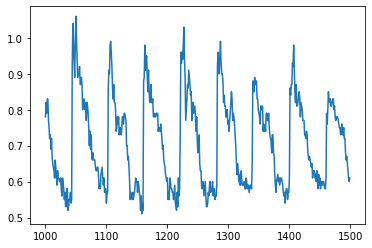

In [21]:
x1 = 1000
y1 = 1500
ax1 = plt.plot(range(x1, y1), run1['Pressure1'][x1:y1])

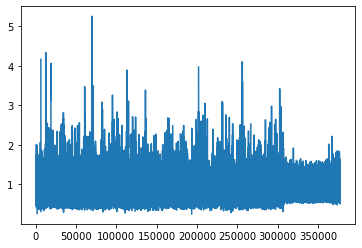

In [14]:
x5 = 0
y5 = len(run5)
ax5 = plt.plot(range(x5, y5), run5['Pressure5'][x5:y5])

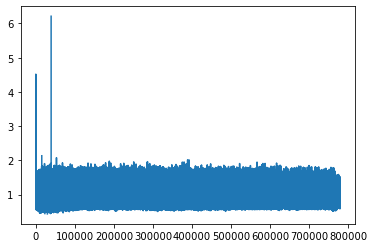

In [15]:
x9 = 0
y9 = len(run9)
ax9 = plt.plot(range(x9, y9), run9['Pressure9'][x9:y9])

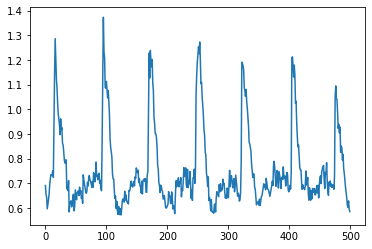

In [18]:
x11 = 0
y11 = 500
ax11 = plt.plot(range(x11, y11), run11['Pressure11'][x11:y11])

[]

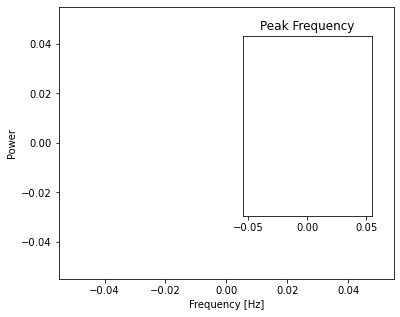

In [25]:
time_step = 1
period = 5

# The FFT of the signal
sig_fft = np.fft.fft(run1['Pressure1'])

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)**2

# The corresponding frequencies
sample_freq = np.fft.fftfreq(len(run1), d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

# Check that it does indeed correspond to the frequency that we generate
# the signal with
# np.allclose(peak_freq, 1./period)

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak Frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])

# scipy.signal.find_peaks_cwt can also be used for more advanced
# peak detection